In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn import datasets
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn import model_selection
from sklearn import neighbors
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from rulefit import RuleFit
import statsmodels.api as sm

#Load Data
a=["date", "Day","Appliances","lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]
b=["Appliances","lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]
c=["lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]
d=["Appliances"]
df = pd.read_csv("energydata_complete.csv",usecols=a)
df2=  pd.read_csv("energydata_complete.csv",usecols=b)
df1 = df[['date','Day']]
data = df[['Appliances','lights','T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9','T_out','Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',"Tdewpoint",'rv1', 'rv2' ]]
scaler = StandardScaler()
scaler.fit(data)
#print()
#print(scaler.data_max_)
data_trans = scaler.transform(data)
df2.loc[:,:]=data_trans
df2.head()
df = pd.concat([df1, df2], axis=1)
df.head()
del a[0]
del a[0]

C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df.head()

,date,Day,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,Monday,-0.367676,3.301264,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,...,-1.217324,0.958136,-0.152788,-2.976328,0.82208,1.207694,2.091596,0.366854,-0.807974,-0.807974
1,2016-01-11 17:10:00,Monday,-0.367676,3.301264,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,...,-1.200778,0.965363,-0.175352,-2.962813,0.82208,1.071703,1.766584,0.343017,-0.440240,-0.440240
2,2016-01-11 17:20:00,Monday,-0.465215,3.301264,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,...,-1.233869,0.950910,-0.196035,-2.949298,0.82208,0.935713,1.441572,0.319180,0.252109,0.252109
3,2016-01-11 17:30:00,Monday,-0.465215,4.561378,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,...,-1.233869,0.926821,-0.218599,-2.935783,0.82208,0.799723,1.116559,0.295343,1.408801,1.408801
4,2016-01-11 17:40:00,Monday,-0.367676,4.561378,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,...,-1.233869,0.926821,-0.241162,-2.922268,0.82208,0.663733,0.791547,0.271506,-1.028122,-1.028122


In [3]:
y=df['Appliances']
X=df[["lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]]

R-Squared Value: 0.16
MAE: 0.5245718032432903
MSE: 0.8697291579049244
RMSE: 0.9325927074049659


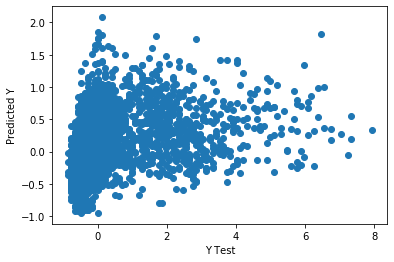

R-Squared Value: 0.11
MAE: 0.5123098461790804
MSE: 0.8358379289354457
RMSE: 0.914241723471121


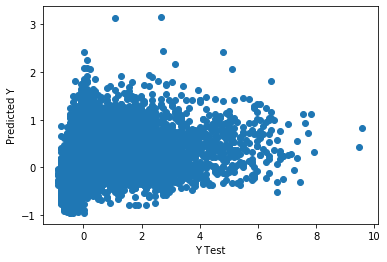

CV Scores
R-Squared Value: 0.16
MAE: 0.5123098461790804
MSE: 0.8358379289354457
RMSE: 0.914241723471121


Text(0, 0.5, 'Predicted Y')

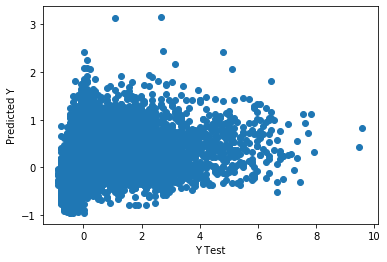

In [4]:
#Validation using Train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R-Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = LinearRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R-Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = LinearRegression()
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("CV Scores" % (results_4))
print("R-Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

R Squared Value: 1.00
MAE: 0.38493951226044737
MSE: 0.8251264612772984
RMSE: 0.9083647182037061


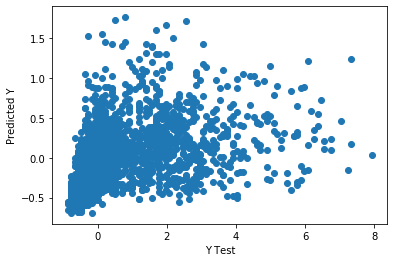

R Squared Value: 0.09
MAE: 0.3569274152896324
MSE: 0.7622354516728211
RMSE: 0.8730609667559426


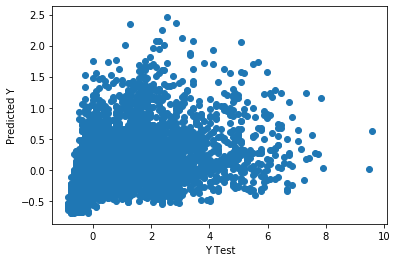

CV Scores
R Squared Value: 0.22
MAE: 0.3569274152896324
MSE: 0.7622354516728211
RMSE: 0.8730609667559426


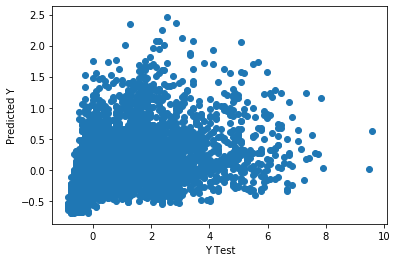

In [5]:
#Validation using Train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, predictions)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = SVR(kernel='rbf')
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = SVR(kernel='rbf')
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("CV Scores" % (results_4))
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

R Squared Value: 0.13
MAE: 0.4043592272872597
MSE: 0.900297075180926
RMSE: 0.9488398575001611


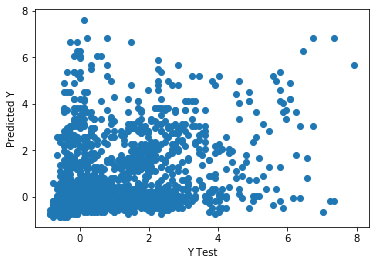

R Squared Value: -2.03
MAE: 0.12131801290944337
MSE: 0.2701119322090835
RMSE: 0.5197229379285501


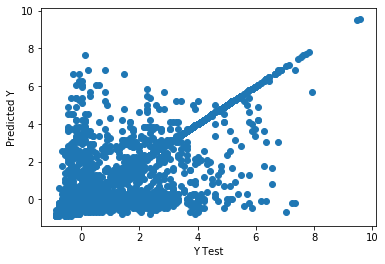

CV Scores
R Squared Value: 0.07
MAE: 0.12131801290944337
MSE: 0.2701119322090835
RMSE: 0.5197229379285501


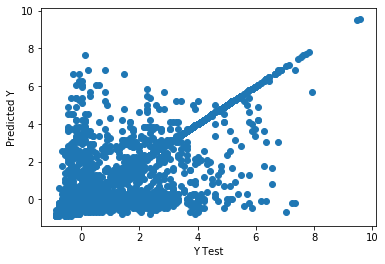

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = DecisionTreeRegressor()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = DecisionTreeRegressor()
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("CV Scores" % (results_4))
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

RMSE value for k=  1 is: 0.9737092640702601
RMSE value for k=  2 is: 0.8957228216889228
RMSE value for k=  3 is: 0.8494026589048945
RMSE value for k=  4 is: 0.8295822731580129
RMSE value for k=  5 is: 0.8295429723763499
RMSE value for k=  6 is: 0.8315367046926466
RMSE value for k=  7 is: 0.8281823582725615
RMSE value for k=  8 is: 0.8306767512455433
RMSE value for k=  9 is: 0.8336342575656549
RMSE value for k=  10 is: 0.8388120849551689
RMSE value for k=  11 is: 0.8408560231651888
RMSE value for k=  12 is: 0.8422267651812791
RMSE value for k=  13 is: 0.8450785634519677
RMSE value for k=  14 is: 0.8472739548950985
RMSE value for k=  15 is: 0.8503583053633028
RMSE value for k=  16 is: 0.8523676249247658
RMSE value for k=  17 is: 0.8550099150957119
RMSE value for k=  18 is: 0.8582382074160577
RMSE value for k=  19 is: 0.8618394662852684
RMSE value for k=  20 is: 0.8639102675105566


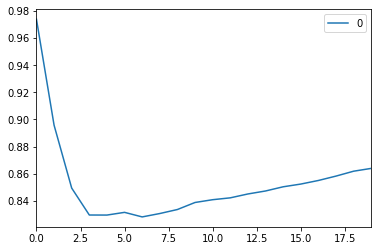

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

R Squared Value: 0.30
MAE: 0.40609993011800016
MSE: 0.7214848769547045
RMSE: 0.8494026589048945


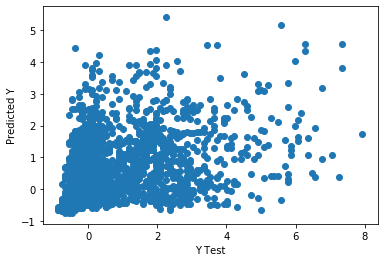

R Squared Value: -0.30
MAE: 0.30254871841598086
MSE: 0.4357264872717284
RMSE: 0.6600958167355163


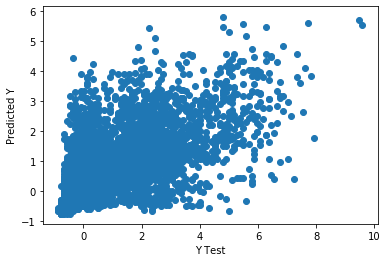

R Squared Value: 0.34
MAE: 0.30254871841598086
MSE: 0.4357264872717284
RMSE: 0.6600958167355163


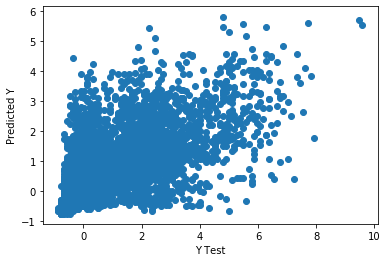

In [8]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = neighbors.KNeighborsRegressor(n_neighbors = 3)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = neighbors.KNeighborsRegressor(n_neighbors = 5)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

R Squared Value: 0.25
MAE: 0.47530509584246644
MSE: 0.7788649471176512
RMSE: 0.88253325553072


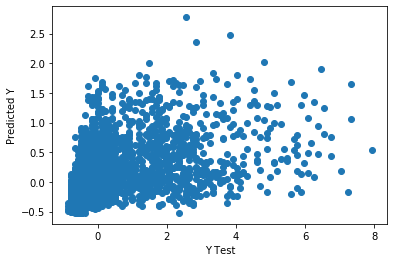

R Squared Value: 0.01
MAE: 0.4449789162303225
MSE: 0.6685076120088749
RMSE: 0.8176231479164927


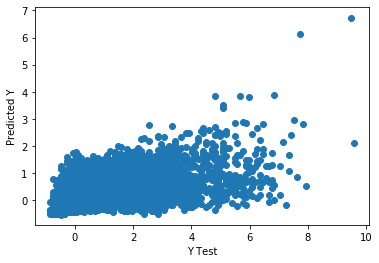

R Squared Value: 0.26
MAE: 0.4449789162303225
MSE: 0.6685076120088749
RMSE: 0.8176231479164927


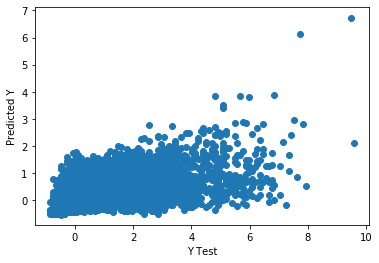

In [9]:
params={'n_estimators':500,'max_depth':4,'min_samples_split':2,
        'learning_rate':0.01,'loss':'ls'}

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model=ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = ensemble.GradientBoostingRegressor(**params)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = ensemble.GradientBoostingRegressor(**params)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

R Squared Value: 0.49
MAE: 0.3470144137842322
MSE: 0.5236023199662325
RMSE: 0.7236037036708923


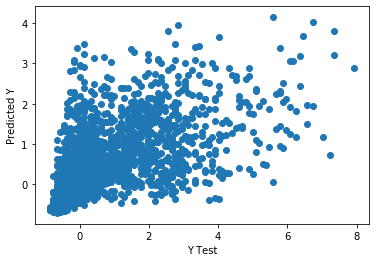

R Squared Value: -0.30
MAE: 0.18990521526573598
MSE: 0.20371250084648576
RMSE: 0.4513452124997957


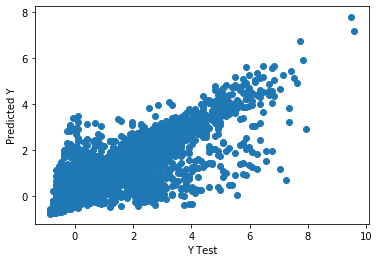

R Squared Value: 0.50
MAE: 0.18990521526573598
MSE: 0.20371250084648576
RMSE: 0.4513452124997957


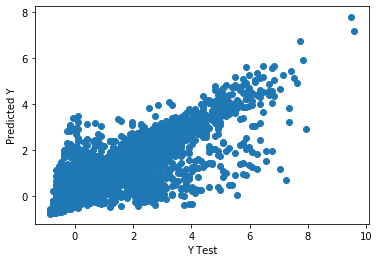

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model=ensemble.BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = ensemble.BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = ensemble.BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

R Squared Value: 0.49
MAE: 0.35106275043327434
MSE: 0.5302772673271691
RMSE: 0.7282013920112822


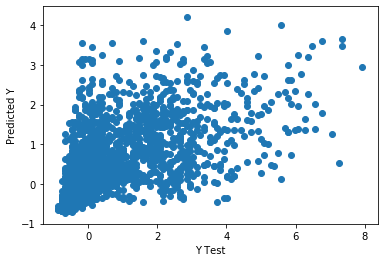

R Squared Value: -0.31
MAE: 0.19299177168184847
MSE: 0.20854840331102037
RMSE: 0.456671001171544


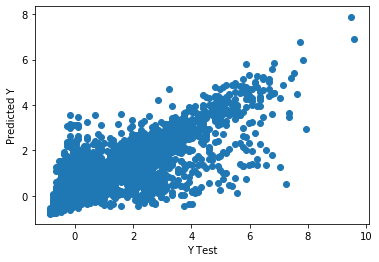

R Squared Value: 0.49
MAE: 0.19299177168184847
MSE: 0.20854840331102037
RMSE: 0.456671001171544


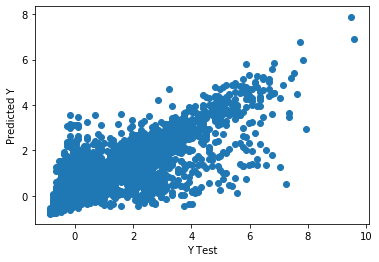

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model=RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = RandomForestRegressor(n_estimators = 100, random_state = 0)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = RandomForestRegressor(n_estimators = 100, random_state = 0)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [12]:
y=df['Appliances'].values
X=df[["lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]].values
#Validation using Train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
rf = RuleFit()
rf.fit(X_train, y_train)
predictions=rf.predict(X_test)
rules = rf.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)
print(rules)

C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


                                                   rule    type      coef  \
2                                             feature_2  linear  0.068451   
13                                           feature_13  linear -0.097879   
25                                           feature_25  linear  0.004129   
22                                           feature_22  linear -0.043776   
21                                           feature_21  linear  0.004639   
20                                           feature_20  linear  0.092346   
19                                           feature_19  linear -0.028118   
17                                           feature_17  linear  0.117897   
15                                           feature_15  linear  0.127686   
3                                             feature_3  linear -0.266277   
12                                           feature_12  linear  0.107812   
11                                           feature_11  linear  0.142373   

R Squared Value: 0.49
MAE: 0.4775550069383429
MSE: 0.7317094366603999
RMSE: 0.8554001617140365


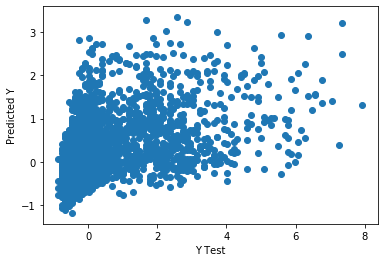

In [13]:
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()